In [1]:
# BUSQUEDA EN PAGINAS CON FORMULARIOS, PAGINAS QUE LA URL NO SE ACTUALIZA CON LA INFORMACION QUE SE BUSCA,
# LA URL ES LA MISMA ANTES Y DESPUES DE LA BUSQQUEDA.
# SE USA DE REQUEST LA ORDEN POST, NO SE USA GET POR RAONES OBVIAS

# Ejemplo de búsqueda en la página descrita 

import requests

url = "https://www.mscbs.gob.es/buscador/iniciar.do"

parametros = {
    'search': 'COVID',  # Buscaremos el término 'COVID'
    'buscar': 'msc'     # Dentro de la página del ministerio
}

respuesta = requests.post(url, parametros) # post es el campo en html que indica que es un formulario

html = respuesta.content.decode("utf-8")   

print(html)

<!DOCTYPE html>









<html xmlns="http://www.w3.org/1999/xhtml" xml:lang="es" lang="es">
	<head>	
		<!--  Establece las cabeceras -->
		<meta charset="utf-8">
		<meta http-equiv="X-UA-Compatible" content="IE=edge">
		<meta name="viewport" content="width=device-width, initial-scale=1">
			
		<title>
			Ministerio de Sanidad, Consumo y Bienestar Social  - Buscador
			
		</title>
		
			<meta name="Keywords" content="Ministerio de Sanidad, Consumo y Bienestar Social, Buscador"/>
		
			
		
			<meta name="description" content="Buscador"/>
		
		
		
		<!-- CSS -->
		<link href="../diseno/css/bootstrap.min.css" rel="stylesheet">
		<link href="../diseno/css/ministerio-sanidad.css" rel="stylesheet"> 
		<link href="../diseno/css/ministerio-sanidad-general.css" rel="stylesheet">
		<link href="../diseno/css/jasny-bootstrap.min.css" rel="stylesheet">
		<link href="../diseno/css/font-awesome.min.css" rel="stylesheet">
		<link href="../diseno/css/formularios.css" rel="stylesheet">
		<link href="../

In [5]:
# beautiful soup esun parseador tipo dom especializado para el codigo html
from bs4 import BeautifulSoup

soup = BeautifulSoup(html, 'html.parser')

#  print(soup.prettify())  # Simplemente nos permite ver el documento mejor formatado (indentaciones, espacios en blanco...)
# Buscamos un <div class="capaCentroBuscador">

cuadroResultados = soup.find('div', {"class": "capaCentroBuscador"})
print(type(cuadroResultados))

# De ese cuadro extraemos todos los <li> (cada uno tiene un resultado de la búsqueda)

resultados = cuadroResultados.find_all('li')

for r in resultados:
    # Dentro de cada <li> tenemos un <p> con un <a href="URL_DE_LA_NOTICIA">
    urlNoticia = r.p.a['href']  # eteiqueta
    
    tituloNoticia = r.p.a.text  # contenido de texto
    
    print(tituloNoticia)
    print(urlNoticia)


<class 'bs4.element.Tag'>
[Ministerio de Sanidad, Consumo y Bienestar Social - Profesionales - Ruedas de prensa - COVID19]
https://www.mscbs.gob.es/profesionales/saludPublica/ccayes/alertasActual/nCov-China/videosPrensa.htm
[Ministerio de Sanidad, Consumo y Bienestar Social]
https://www.mscbs.gob.es/sanidad/portada/home.htm
[Ministerio de Sanidad, Consumo y Bienestar Social - Gabinete de Prensa - Notas de Prensa]
https://www.mscbs.gob.es/gabinete/notasPrensa.do
[Ministerio de Sanidad, Consumo y Bienestar Social - Contactar]
https://www.mscbs.gob.es/contactar/home.htm
[Ministerio de Sanidad, Consumo y Bienestar Social - Profesionales - Información para la ciudadanía - Coronavirus]
https://www.mscbs.gob.es/profesionales/saludPublica/ccayes/alertasActual/nCov-China/ciudadania.htm
[Ministerio de Sanidad, Consumo y Bienestar Social - Profesionales - Spain Travel Health]
https://www.mscbs.gob.es/profesionales/saludPublica/ccayes/alertasActual/nCov-China/spth.htm
[Ministerio de Sanidad, Consu

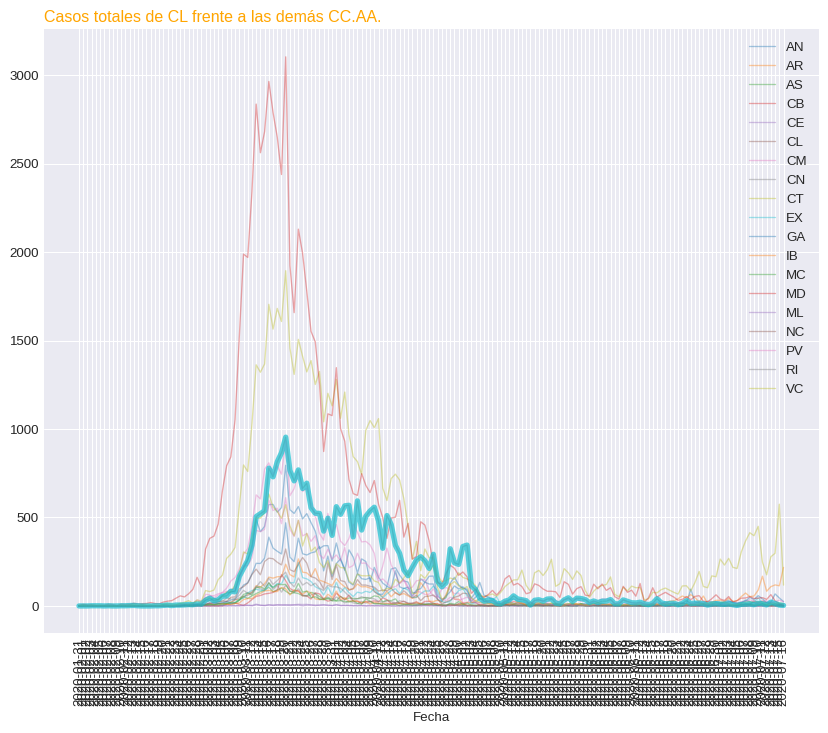

In [5]:
#formato no html: json o csv

import requests
from io import StringIO
import csv
import matplotlib.pyplot as plt

url="https://cnecovid.isciii.es/covid19/resources/datos_ccaas.csv"

respuesta = requests.get(url)

contenidoCSV = respuesta.content.decode("iso-8859-1")   # Lo podemos codificar a una cadena "normal"

#print(contenidoCSV)

results = []
f = StringIO(contenidoCSV)
reader = csv.reader(f, delimiter=',')

fila = 0

for row in reader: # each row is a list
    if fila != 0:  # Ignoramos la primera fila porque es el nombre de las columnas
        results.append(row)
        
    fila += 1
        
# results = results[:-9]  # Eliminamos las 8 ultimas filas porque es un texto que no tiene que ver con los datos


#print(results)

# Ahora que tenemos los datos vamos a hacer unas gráficas

# Recorremos los resultados creando estructuras de datos más comodas para los gráficos

ccaa = []
fechas = []
casosTotales = {}
pcr = {}
testAC = {}
hospitalizados = {}
uci = {}
fallecidos = {}
recuperados = {}


for r in results:
    comunidad = r[0]
    fecha = r[1]
    t = 0 if not r[2] else int(r[2])
    p = 0 if not r[3] else int(r[3])
    a = 0 if not r[4] else int(r[4])
    h = 0 if not r[5] else int(r[5])
    u = 0 if not r[6] else int(r[6])
#    f = 0 if not r[7] else int(r[7])
#    r = 0 if not r[8] else int(r[8]) han eliminado 'recuperados' daria: error out of range index

    if not comunidad in ccaa:
        ccaa.append(comunidad)
        
        casosTotales[comunidad] = []
        pcr[comunidad] = []
        testAC[comunidad] = []
        hospitalizados[comunidad] = []
        uci[comunidad] = []
        fallecidos[comunidad] = []
        recuperados[comunidad] = []

    if not fecha in fechas:
        fechas.append(fecha)
        
    casosTotales[comunidad].append(t)
    pcr[comunidad].append(p)
    testAC[comunidad].append(a)
    hospitalizados[comunidad].append(h)
    uci[comunidad].append(u)
    fallecidos[comunidad].append(f)
    recuperados[comunidad].append(r)
    
    
variableGrafica = casosTotales
variableTexto = "Casos totales"
comunidadResaltada = "CL"

#print(ccaa)
#print(fechas)
#print(fallecidos['AN'])

plt.style.use('seaborn-darkgrid')
my_dpi=96
plt.figure(figsize=(1000/my_dpi, 800/my_dpi), dpi=my_dpi)

for comunidad in ccaa:
   plt.plot(fechas, variableGrafica[comunidad], marker='', linewidth=1, alpha=0.4, label=comunidad)
 
plt.plot(fechas, variableGrafica[comunidadResaltada], marker='', linewidth=4, alpha=0.7)


plt.title(variableTexto + " de " + comunidadResaltada + " frente a las demás CC.AA.", loc='left', fontsize=12, fontweight=0, color='orange')
plt.xlabel("Fecha")
plt.ylabel("")
plt.xticks(range(0, len(fechas), 1), fechas, rotation=90)
plt.legend()
plt.savefig('plot_evol_' + variableTexto + '_covid.png') # Guardamos 

plt.show()

In [8]:
# FORMATO JSON
# pruebas con un servicio de geolocalizacion
'''
https://nominatim.org/release-docs/develop/

Tal y como se nos dice en la documentación, para hacer una consulta tenemos varios parámetros que le podemos pasar a la petición de la página:

https://nominatim.openstreetmaps.org/search

busqueda normal, tipo get
'''


import requests
import json 

url = "https://nominatim.openstreetmaps.org/search"

parametros = {
    'q': 'Facultad de Ciencias, salamanca',  
    'format': 'json'   
}

respuesta = requests.get(url, parametros)

textoJson = respuesta.content.decode("utf-8")   # string 

#print(textoJson)

resultados = json.loads(textoJson)  # transforma el string en un objeto

for r in resultados:
    print("+ Nombre: " + r['display_name'])
    print("  + Coordenadas: " + "(" + r['lat'] + ", " + r['lon'] + ")")
    print("  + Tipo: " + r['type'])
    print("  + Clase: " + r['class'])
    


+ Nombre: Salamanca, Maipú, Córdoba, Municipio de Córdoba, Pedanía Capital, Departamento Capital, Córdoba, X5000, Argentina
  + Coordenadas: (-31.4387049, -64.1580286)
  + Tipo: residential
  + Clase: highway
+ Nombre: Salamanca, Colón, Córdoba, Municipio de Córdoba, Pedanía Capital, Departamento Capital, Córdoba, X5014, Argentina
  + Coordenadas: (-31.4401663, -64.1569785)
  + Tipo: residential
  + Clase: highway
+ Nombre: Salamanca, Tiro Suizo, Distrito Sur, Rosario, Municipio de Rosario, Departamento Rosario, Santa Fe, S2001, Argentina
  + Coordenadas: (-32.9944918, -60.6492492)
  + Tipo: residential
  + Clase: highway
+ Nombre: Salamanca, Población Raúl Silva Henríquez, Arica, Provincia de Arica, Región de Arica y Parinacota, 1020759, Chile
  + Coordenadas: (-18.4369116, -70.2928037)
  + Tipo: living_street
  + Clase: highway
+ Nombre: Salamanca, Los Álamos de La Cruz, Manzanal, Rancagua, Provincia de Cachapoal, Región del Libertador General Bernardo O'Higgins, 2850546, Chile
  + C